# **Uber Dataset 3 Notebook**


**Import Satements**

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

**Loading Data**

In [73]:
# Load the data
df = pd.read_csv('Dataset3.csv')

# Display the columns of the dataset
print("Fields of the dataset:")
print(df.columns)

print('\r\n')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()



Fields of the dataset:
Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


First few rows of the dataset:


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,3/23/2019 20:21,3/23/2019 20:27,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,3/4/2019 16:11,3/4/2019 16:19,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,3/27/2019 17:53,3/27/2019 18:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3/10/2019 1:23,3/10/2019 1:49,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,3/30/2019 13:27,3/30/2019 13:37,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**Feature Engineering**

**Generate Hours from DateTime**

In [74]:
# Convert 'pickup_datetime' to a datetime data type
df['pickup'] = pd.to_datetime(df['pickup'])

# Extract the date, time, and other components
df['hours'] = df['pickup'].dt.hour

df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'hours'],
      dtype='object')

**Removing Unnecessary Features**

In [75]:
df.drop(['pickup', 'dropoff','passengers','tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'] , inplace=True , axis= 1)
df.columns

Index(['distance', 'fare', 'hours'], dtype='object')

**Data Cleaning**

In [76]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the imputed dataset
df.head()


Missing values in the dataset:
distance    0
fare        0
hours       0
dtype: int64


,distance,fare,hours
0,1.60,7.0,20.0
1,0.79,5.0,16.0
2,1.37,7.5,17.0
3,7.70,27.0,1.0
4,2.16,9.0,13.0


**Display Imputed Dataset Columns**

In [77]:
df.columns
df.head()

,distance,fare,hours
0,1.60,7.0,20.0
1,0.79,5.0,16.0
2,1.37,7.5,17.0
3,7.70,27.0,1.0
4,2.16,9.0,13.0


**Feature Scaling**

In [78]:
# Separate 'hours' column before standardizing
hours = df['hours']
df_features = df.drop(columns=['hours'])

# Standardize the remaining features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Reattach 'hours' column to the scaled dataframe
df_scaled['hours'] = hours

# Display the scaled dataset
df_scaled.head()

,distance,fare,hours
0,-0.372199,-0.527324,20.0
1,-0.583821,-0.700471,16.0
2,-0.432289,-0.484038,17.0
3,1.221502,1.204142,1.0
4,-0.225892,-0.354178,13.0


**Data Visualization**



1. Frequency Distribution for Hours




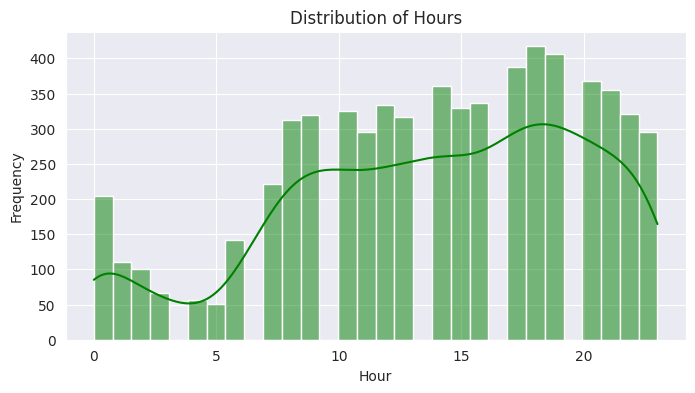

In [79]:
# Visualize the distribution of 'hours'
plt.figure(figsize=(8, 4))
sns.set_style(style='darkgrid')
sns.histplot(df['hours'], bins=30, kde=True, color='green')
plt.title('Distribution of Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


1. Distance versus Fare

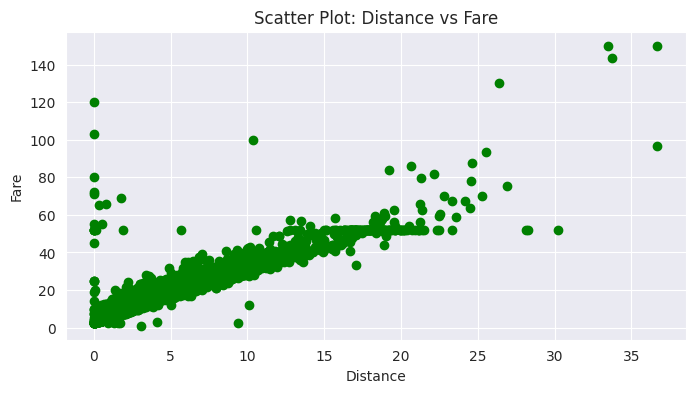

In [80]:
plt.figure(figsize=(8, 4))
plt.scatter(df['distance'], df['fare'], color = 'green')
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.title('Scatter Plot: Distance vs Fare')
plt.show()

**Models and Evaluation**

 **1. Linear Regression Model**

Split Data into Train and Test Sets

In [81]:
# Split the data into train and test sets
X = df.drop(columns=['fare'])
y = df['fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

Predictions and Model Evaluation

In [83]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")


Mean Squared Error (MSE): 21.82
Mean Absolute Error (MAE): 2.00
R-squared (R2): 0.83
Root Mean Squared Error (RMSE): 4.67


**2. Random Rainforest Regressor**

**Split Data into Train and Test Sets:** Random Rainforest Regressor and Gradient Boosting Regression



In [84]:
# Split the data into train and test sets
X = df.drop(columns=['fare'])
y = df['fare'].values.ravel() # Reshape y to a 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Random Rainforest Regressor Model

In [85]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Predictions and Model Evaluation

In [86]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")


Random Forest - Mean Squared Error (MSE): 20.02
Random Forest - Mean Absolute Error (MAE): 1.97
Random Forest - R-squared (R2): 0.84
Random Forest - Root Mean Squared Error (RMSE): 4.47


**3. Gradient Boosting Regression**

Train Gradient Boosting Regression Model

In [87]:
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

Predictions and Model Evaluation

In [88]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Gradient Boosting - Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Gradient Boosting - R-squared (R2): {r2_gb:.2f}")
print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb:.2f}")


Gradient Boosting - Mean Squared Error (MSE): 20.19
Gradient Boosting - Mean Absolute Error (MAE): 1.78
Gradient Boosting - R-squared (R2): 0.84
Gradient Boosting - Root Mean Squared Error (RMSE): 4.49


**Model Prediction Comparisons**

In [89]:
# Create a DataFrame with actual and predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test[:20],  # Display the first 20 rows
    'Random Forest Predicted': y_pred_rf[:20],
    'Gradient Boosting Predicted': y_pred_gb[:20],
    'Linear Regression Predicted': y_pred_lr[:20]
})

# Display the table
print(actual_vs_predicted.to_string(index=False))

 Actual  Random Forest Predicted  Gradient Boosting Predicted  Linear Regression Predicted
    9.0                 9.277000                     8.353121                     8.379083
    8.5                 8.117726                     7.409257                     8.768763
   14.0                11.022917                    10.878941                    11.526476
   10.5                 9.638938                     9.945546                    10.094873
   11.5                11.620000                    11.467700                    11.487658
   25.5                16.913600                    18.276775                    16.619335
    5.5                 5.800619                     6.749627                     6.986599
   17.5                14.410167                    13.852769                    12.490762
   13.0                15.303833                    13.617074                    12.418158
    3.0                 3.332583                     4.688187                     5.270508

**Data Visualization: Actual vs Predicted Fare**

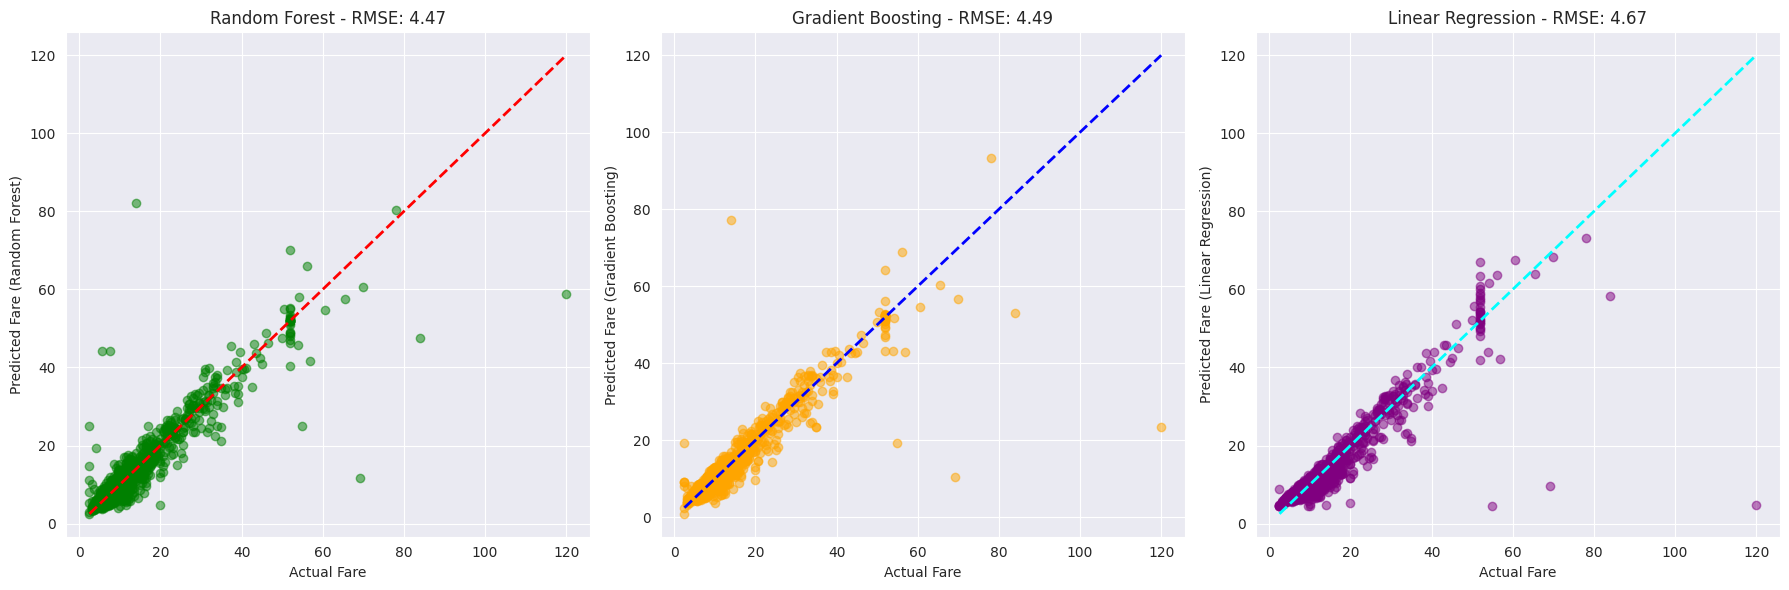

In [90]:
# Data visualization: Actual vs Predicted
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Random Forest)')
plt.title(f'Random Forest - RMSE: {rmse_rf:.2f}')

plt.subplot(132)
plt.scatter(y_test, y_pred_gb, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Gradient Boosting)')
plt.title(f'Gradient Boosting - RMSE: {rmse_gb:.2f}')

plt.subplot(133)
plt.scatter(y_test, y_pred_lr, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='cyan', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Linear Regression)')
plt.title(f'Linear Regression - RMSE: {rmse_lr:.2f}')

plt.tight_layout()
plt.show()

**Note**


Dataset 3 is the smallest amongst the three(3) chosen hence, yields the highest accuracy.